# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows - 1 points

In [1]:
%matplotlib inline 

In [2]:
import numpy as np   
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn import metrics
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.stats import zscore

In [3]:
# reading the CSV file into pandas dataframe
cars_data = pd.read_csv("car-mpg-1.csv") 

In [4]:
cars_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis - 2 points

In [5]:
print("DataTypes: ",cars_data.dtypes)
print("\nShape: ",cars_data.shape)

DataTypes:  mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car name     object
dtype: object

Shape:  (398, 9)


In [6]:
cars_data.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary. - 1 points

In [7]:
cars_data.isna().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

In [8]:
cars_data.isnull().any()

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car name    False
dtype: bool

In [9]:
print((cars_data<0).any())

mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
car name     True
dtype: bool


In [10]:
cars_data = cars_data.replace('?', np.nan)
cars_data[cars_data.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [11]:
#Car name is dropped because as it is not neccesary
cars_data = cars_data.drop('car name', axis=1)

In [12]:
cars_data['hp'] = cars_data['hp'].astype('float64')  # converting the hp column from object / string type to float

In [13]:
#replacing the missing values in 'hp' with median value of 'hp'
cars_data = cars_data.apply(lambda x: x.fillna(x.median()),axis=0) 
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
mpg       398 non-null float64
cyl       398 non-null int64
disp      398 non-null float64
hp        398 non-null float64
wt        398 non-null int64
acc       398 non-null float64
yr        398 non-null int64
origin    398 non-null int64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences - 1 points

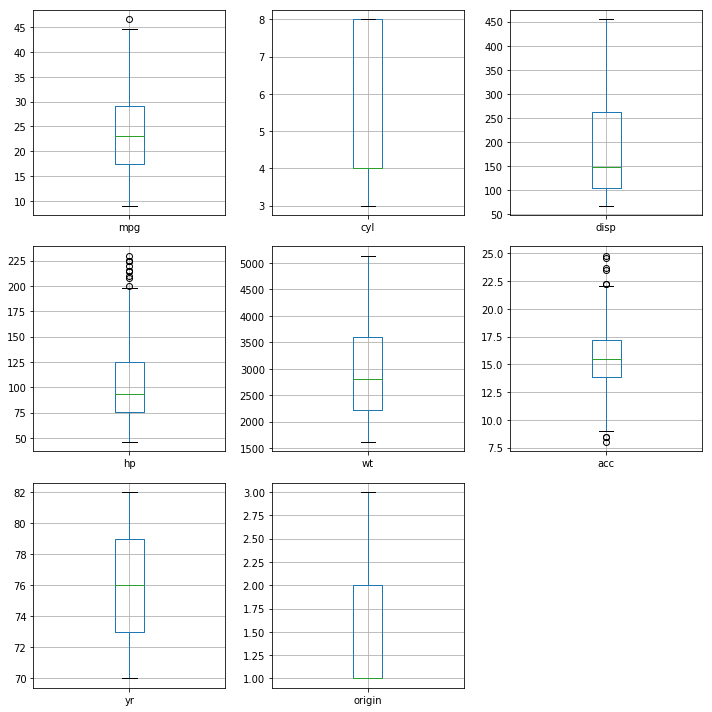

In [14]:
fig, axes = plt.subplots(3,3,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(cars_data.columns.values)[:]):
    a = cars_data.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,2]) # remove empty subplot
plt.tight_layout() 
plt.show()

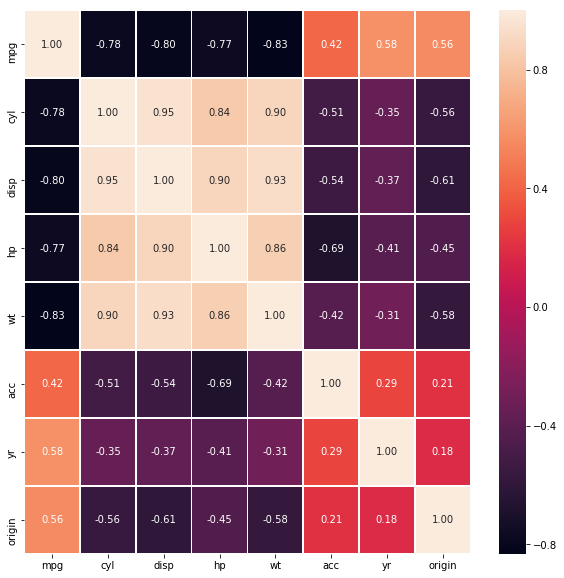

In [15]:
# Correlation
car_corr = cars_data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(car_corr,annot=True, linewidth=.5, fmt='.2f' , ax=ax)

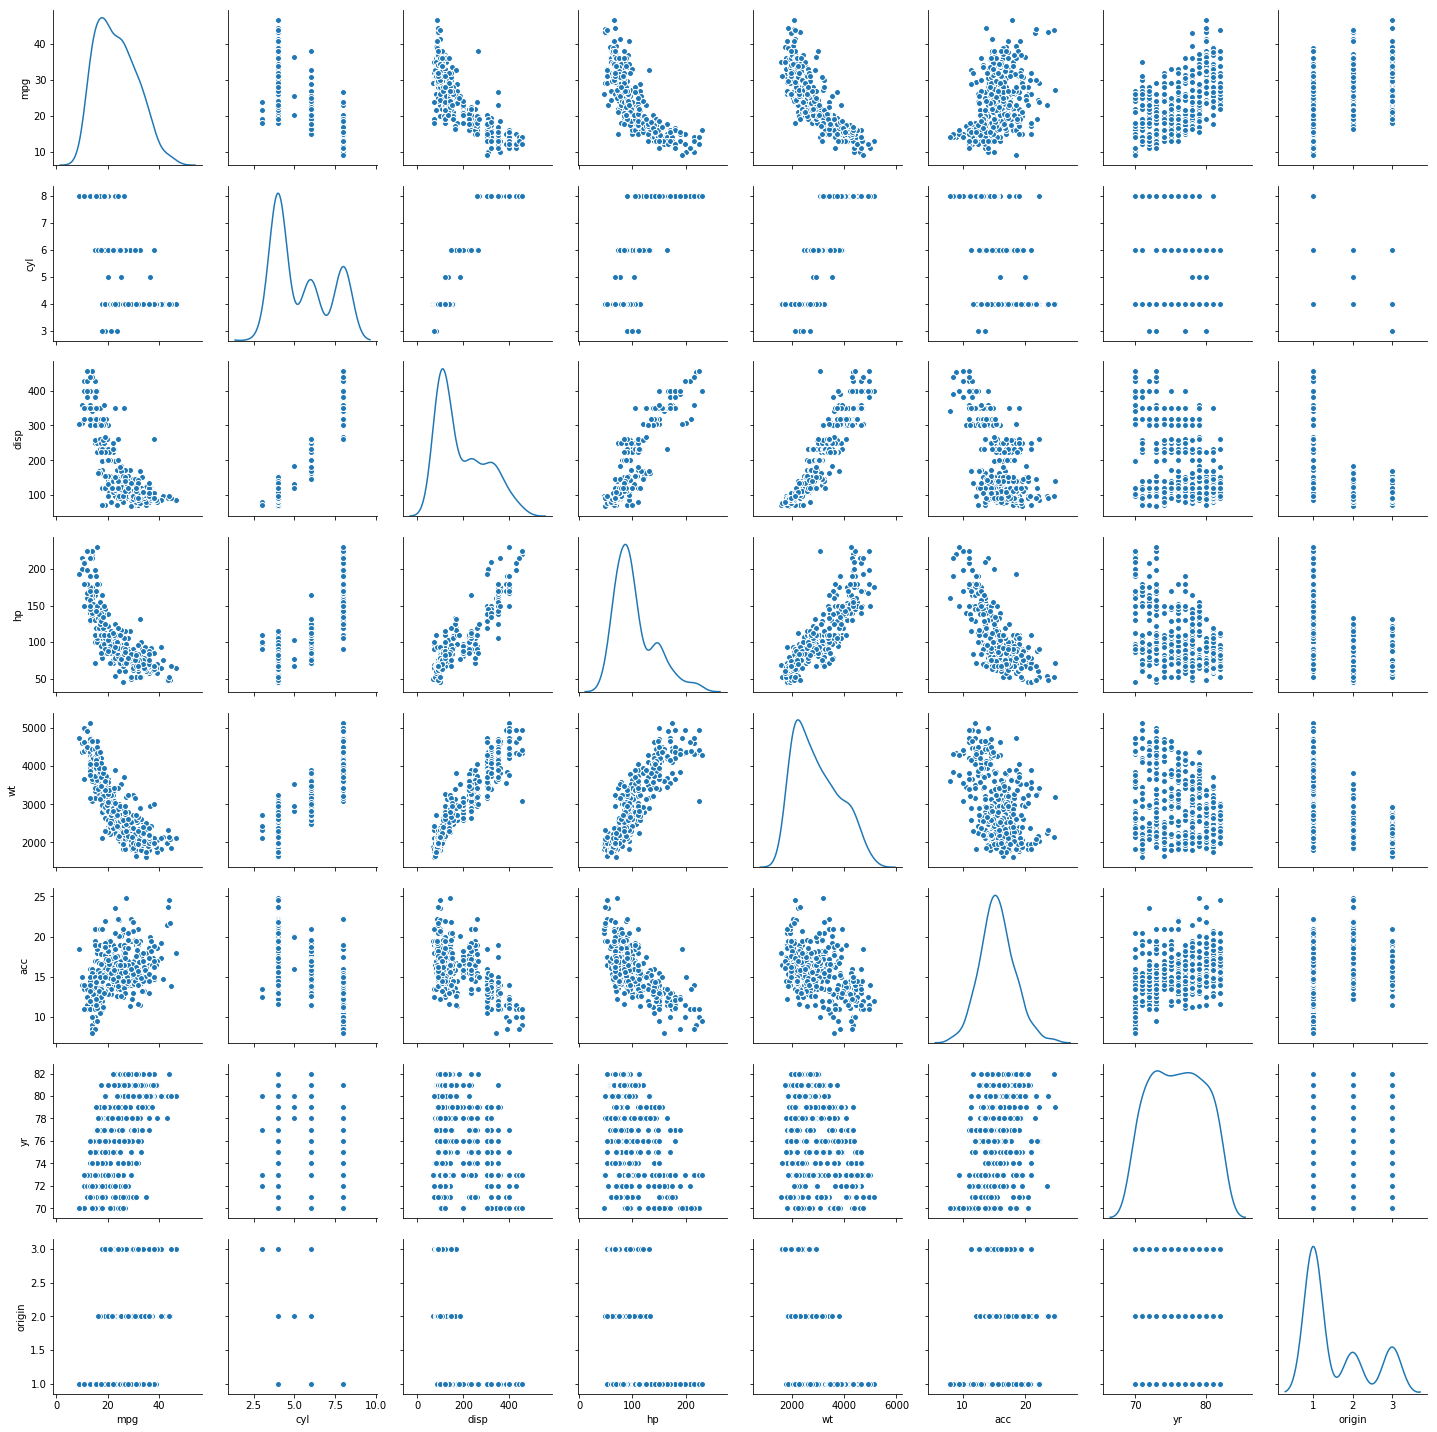

In [16]:
#pair plot analysis to visually check number of likely clusters
sns.pairplot(cars_data, diag_kind='kde')

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns - 1.5 points

In [17]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be 1, 2 and 3... with one hot coding
cars_data = pd.get_dummies(cars_data, columns=['origin'])

In [18]:
cars_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [19]:
cars_data.duplicated().any() # checking for duplicates rows as it doesn't have any it is showing false

False

In [20]:
import datetime
now = datetime.datetime.now()
year = cars_data['yr'] + 1900
cars_data['age'] = now.year - year
cars_data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin_1,origin_2,origin_3,age
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0,48
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0,48
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0,48
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0,48
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0,48


In [21]:
# as we have created new feature age we can drop year column from the dataframe
cars_data = cars_data.drop('yr', axis=1)
cars_data.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,18.0,8,307.0,130.0,3504,12.0,1,0,0,48
1,15.0,8,350.0,165.0,3693,11.5,1,0,0,48
2,18.0,8,318.0,150.0,3436,11.0,1,0,0,48
3,16.0,8,304.0,150.0,3433,12.0,1,0,0,48
4,17.0,8,302.0,140.0,3449,10.5,1,0,0,48


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers - 2 points

In [22]:
numeric_col = cars_data.select_dtypes(include=['float64','int64']).columns
cars_data_z = cars_data
cars_data_z[numeric_col] = cars_data[numeric_col].apply(zscore)
cars_data_z.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,1,0,0,1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,1,0,0,1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,1,0,0,1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,1,0,0,1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,1,0,0,1.627426


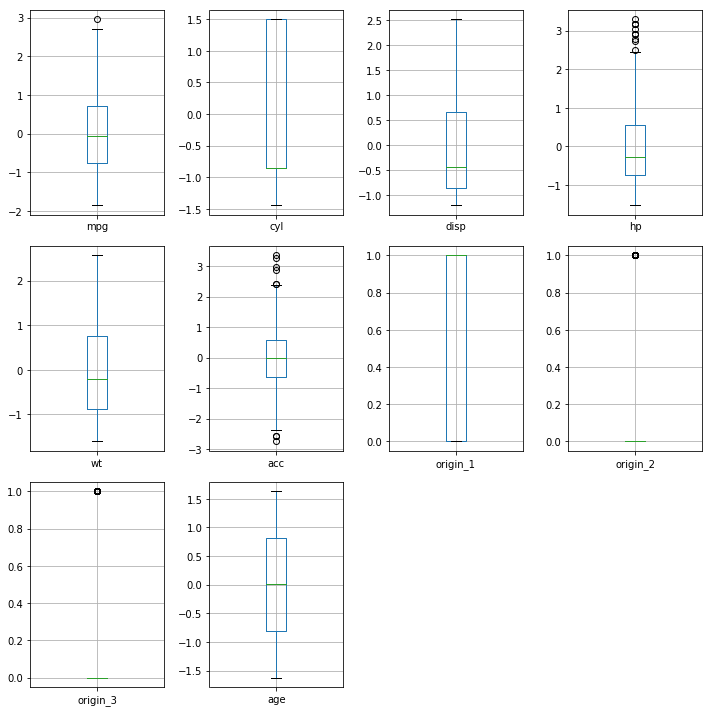

In [23]:
fig, axes = plt.subplots(3,4,figsize=(10,10)) # create figure and axes

for i,el in enumerate(list(cars_data_z.columns.values)[:]):
    a = cars_data_z.boxplot(el, ax=axes.flatten()[i])

fig.delaxes(axes[2,2]) # remove empty subplot
fig.delaxes(axes[2,3]) # remove empty subplot
plt.tight_layout() 
plt.show()

In [24]:
cars_data_z.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,2.761610e-16,1.001259,-1.859374,-0.770491,-0.065919,0.702705,2.957335
cyl,398.0,-5.171742e-16,1.001259,-1.444949,-0.856321,-0.856321,1.498191,1.498191
disp,398.0,-8.312725e-17,1.001259,-1.204411,-0.856318,-0.431404,0.658488,2.511784
hp,398.0,1.458911e-16,1.001259,-1.527300,-0.741436,-0.283016,0.542140,3.292662
wt,398.0,-9.902743e-17,1.001259,-1.604943,-0.882827,-0.197362,0.753834,2.565185
acc,398.0,8.982206e-17,1.001259,-2.747814,-0.632879,-0.024722,0.583435,3.351912
origin_1,398.0,6.256281e-01,0.484569,0.000000,0.000000,1.000000,1.000000,1.000000
origin_2,398.0,1.758794e-01,0.381197,0.000000,0.000000,0.000000,0.000000,1.000000
origin_3,398.0,1.984925e-01,0.399367,0.000000,0.000000,0.000000,0.000000,1.000000
age,398.0,-1.304373e-15,1.001259,-1.621983,-0.809631,0.002721,0.815074,1.627426


In [25]:
cars_data_z[cars_data_z['hp'] > 3].shape

(5, 10)

In [26]:
cars_data_z = cars_data_z[cars_data_z['hp'] <= 3]

In [27]:
cars_data_z[cars_data_z['acc'] > 3].shape

(2, 10)

In [28]:
cars_data_z = cars_data_z[cars_data_z['acc'] <= 3]

In [29]:
cars_data_z.shape

(391, 10)

# Q7. Create appropriate clusters with the new data set - 2

In [30]:
# Let us check optimal number of clusters-
cluster_range = range( 1, 10)   # expect 3 to four clusters from the pair panel visual inspection hence restricting from 2 to 6
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 5)
  clusters.fit(cars_data_z)
  labels = clusters.labels_                     # capture the cluster lables
  centroids = clusters.cluster_centers_         # capture the centroids
  cluster_errors.append( clusters.inertia_ )    # capture the intertia

# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2815.047647
1,2,1396.922825
2,3,1052.550326
3,4,838.866978
4,5,756.057645
5,6,697.125591
6,7,651.174388
7,8,596.196200
8,9,574.486377



# Q8. Identify the appropriate clusters with result from above question - 1.5 points

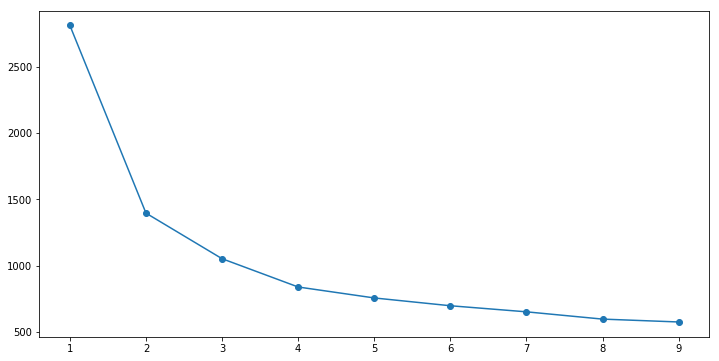

In [31]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [32]:
# The elbow plot shows that 5 might be a good choice for K

# Q9. Check for no of values in each cluster and centers for each variables - 1 point

In [33]:
cluster = KMeans( n_clusters = 5, random_state = 1 )
cluster.fit(cars_data_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [34]:
# Get the centroids.... using function cluster_centers_

centroids = cluster.cluster_centers_
centroids

array([[-5.56931989e-01,  4.28611189e-01,  3.50503008e-01,
        -7.68068481e-02,  3.77949098e-01,  3.97689095e-01,
         9.26829268e-01,  4.87804878e-02,  2.43902439e-02,
         1.11695554e-01],
       [ 4.22613276e-01, -6.66762415e-01, -5.00493696e-01,
        -2.66366463e-01, -3.63622069e-01, -1.22568892e-01,
         7.28813559e-01,  5.08474576e-02,  2.20338983e-01,
        -1.01616125e+00],
       [-1.15537196e+00,  1.49819126e+00,  1.45048677e+00,
         1.42259840e+00,  1.39579417e+00, -1.02157549e+00,
         1.00000000e+00, -3.33066907e-16,  3.05311332e-16,
         6.37559823e-01],
       [ 2.31252600e-01, -8.70009593e-01, -8.46156963e-01,
        -5.90507987e-01, -8.07850821e-01,  3.51866603e-01,
         2.20930233e-01,  4.88372093e-01,  2.90697674e-01,
         7.61546773e-01],
       [ 1.45713356e+00, -8.32457275e-01, -9.13219553e-01,
        -9.29760399e-01, -9.77438101e-01,  5.40012672e-01,
         2.16216216e-01,  2.56756757e-01,  5.27027027e-01,
        -1.

In [35]:
# Let us put the raw centroid values into a dataframe under respective columns

centroid_df = pd.DataFrame(centroids, columns = list(cars_data_z) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
0,-0.556932,0.428611,0.350503,-0.076807,0.377949,0.397689,0.926829,4.878049e-02,2.439024e-02,0.111696
1,0.422613,-0.666762,-0.500494,-0.266366,-0.363622,-0.122569,0.728814,5.084746e-02,2.203390e-01,-1.016161
2,-1.155372,1.498191,1.450487,1.422598,1.395794,-1.021575,1.000000,-3.330669e-16,3.053113e-16,0.637560
3,0.231253,-0.870010,-0.846157,-0.590508,-0.807851,0.351867,0.220930,4.883721e-01,2.906977e-01,0.761547
4,1.457134,-0.832457,-0.913220,-0.929760,-0.977438,0.540013,0.216216,2.567568e-01,5.270270e-01,-1.029186


In [36]:
prediction=cluster.predict(cars_data_z)
cars_data_z['prediction'] = prediction
cars_data_z.groupby("prediction").count()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,origin_3,age
prediction,,,,,,,,,,
0,82,82,82,82,82,82,82,82,82,82
1,59,59,59,59,59,59,59,59,59,59
2,90,90,90,90,90,90,90,90,90,90
3,86,86,86,86,86,86,86,86,86,86
4,74,74,74,74,74,74,74,74,74,74


# Q10. Assign the groups created above to data frame and study the characteristics  for each group. - 2 points

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A6C93C1B00>,
      dtype=object)

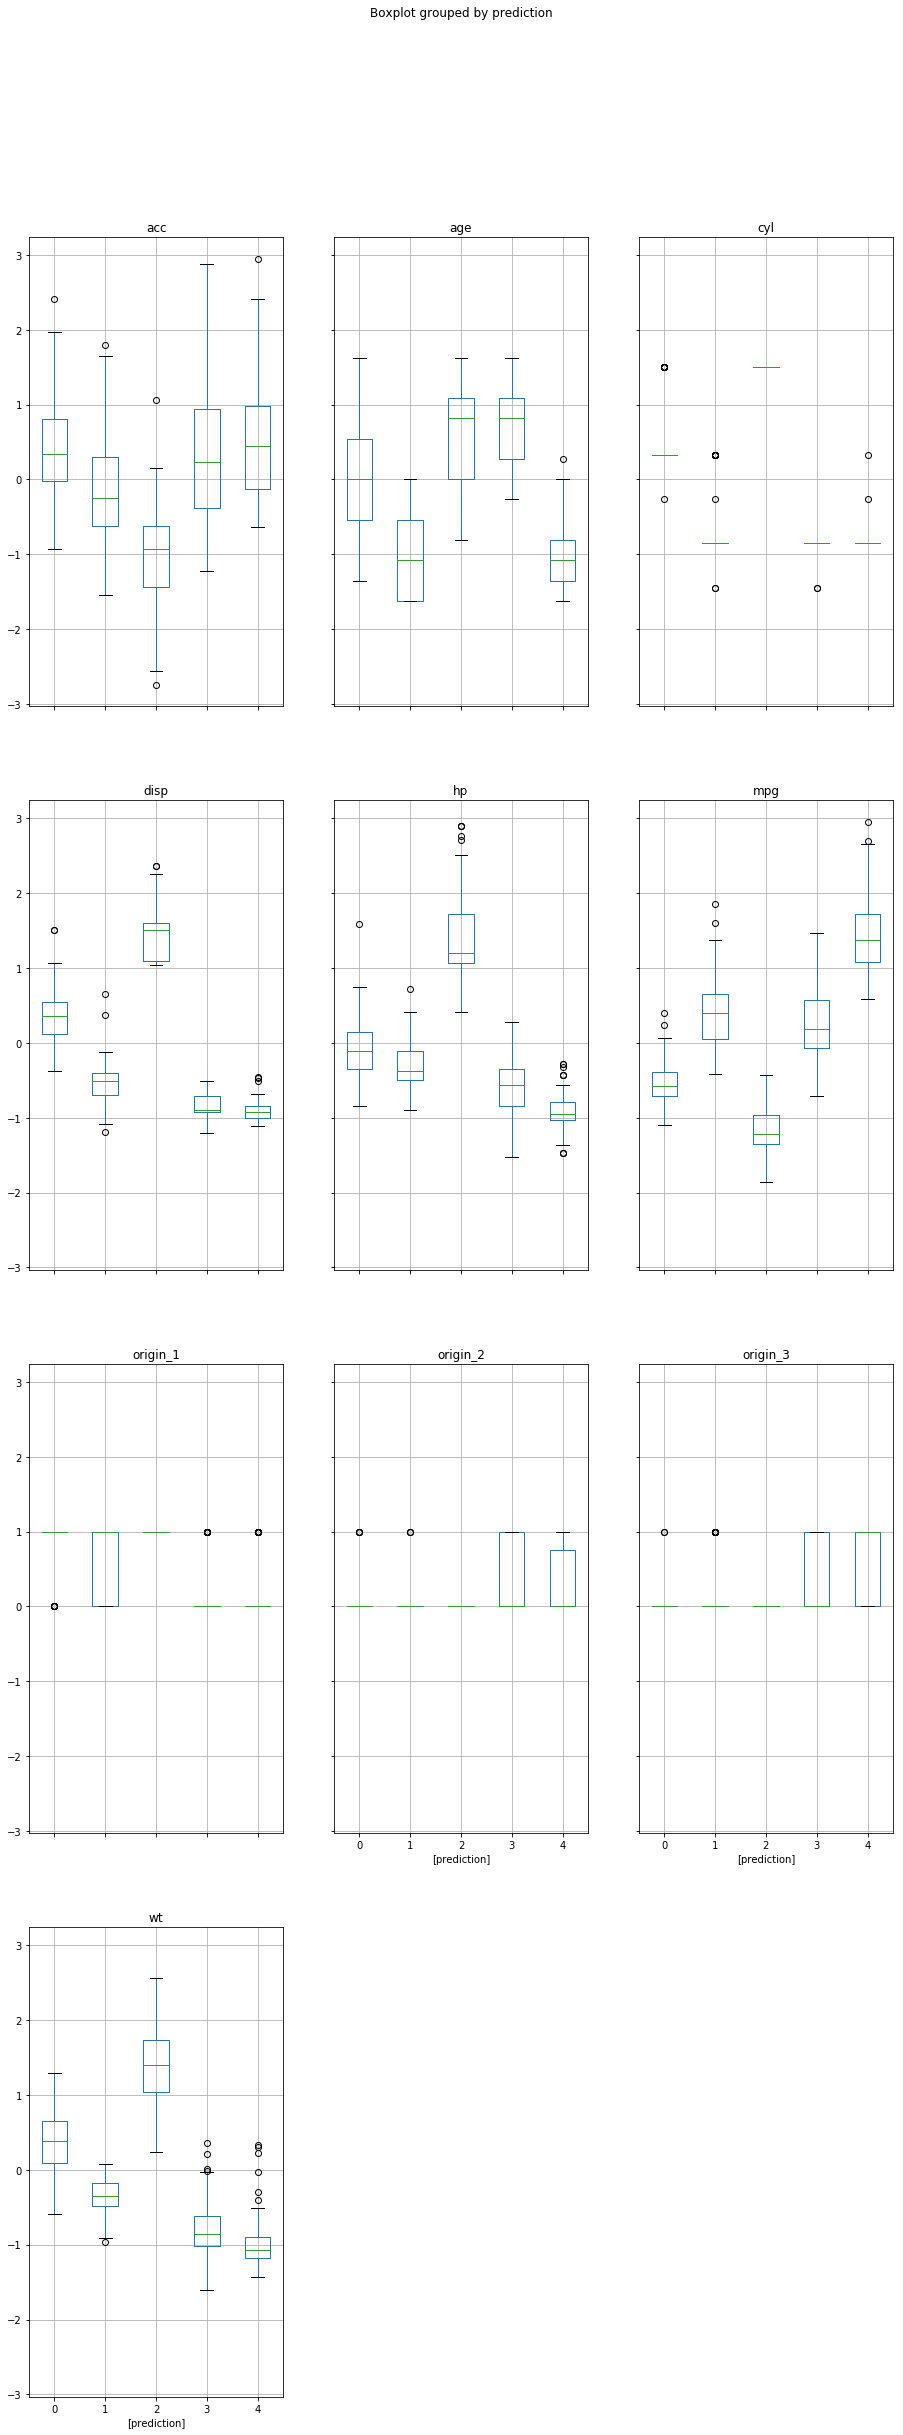

In [37]:
cars_data_z.boxplot(by = 'prediction',  layout=(4,3), figsize=(15, 40))

In [38]:
# Cluster 4 - is having low wt,low disp, high mpg, high acc are the new cars
# cluster 2 - even though less aged but it is having low acc, high disp, high hp low mpg, and also heavy weighted

C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rames\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


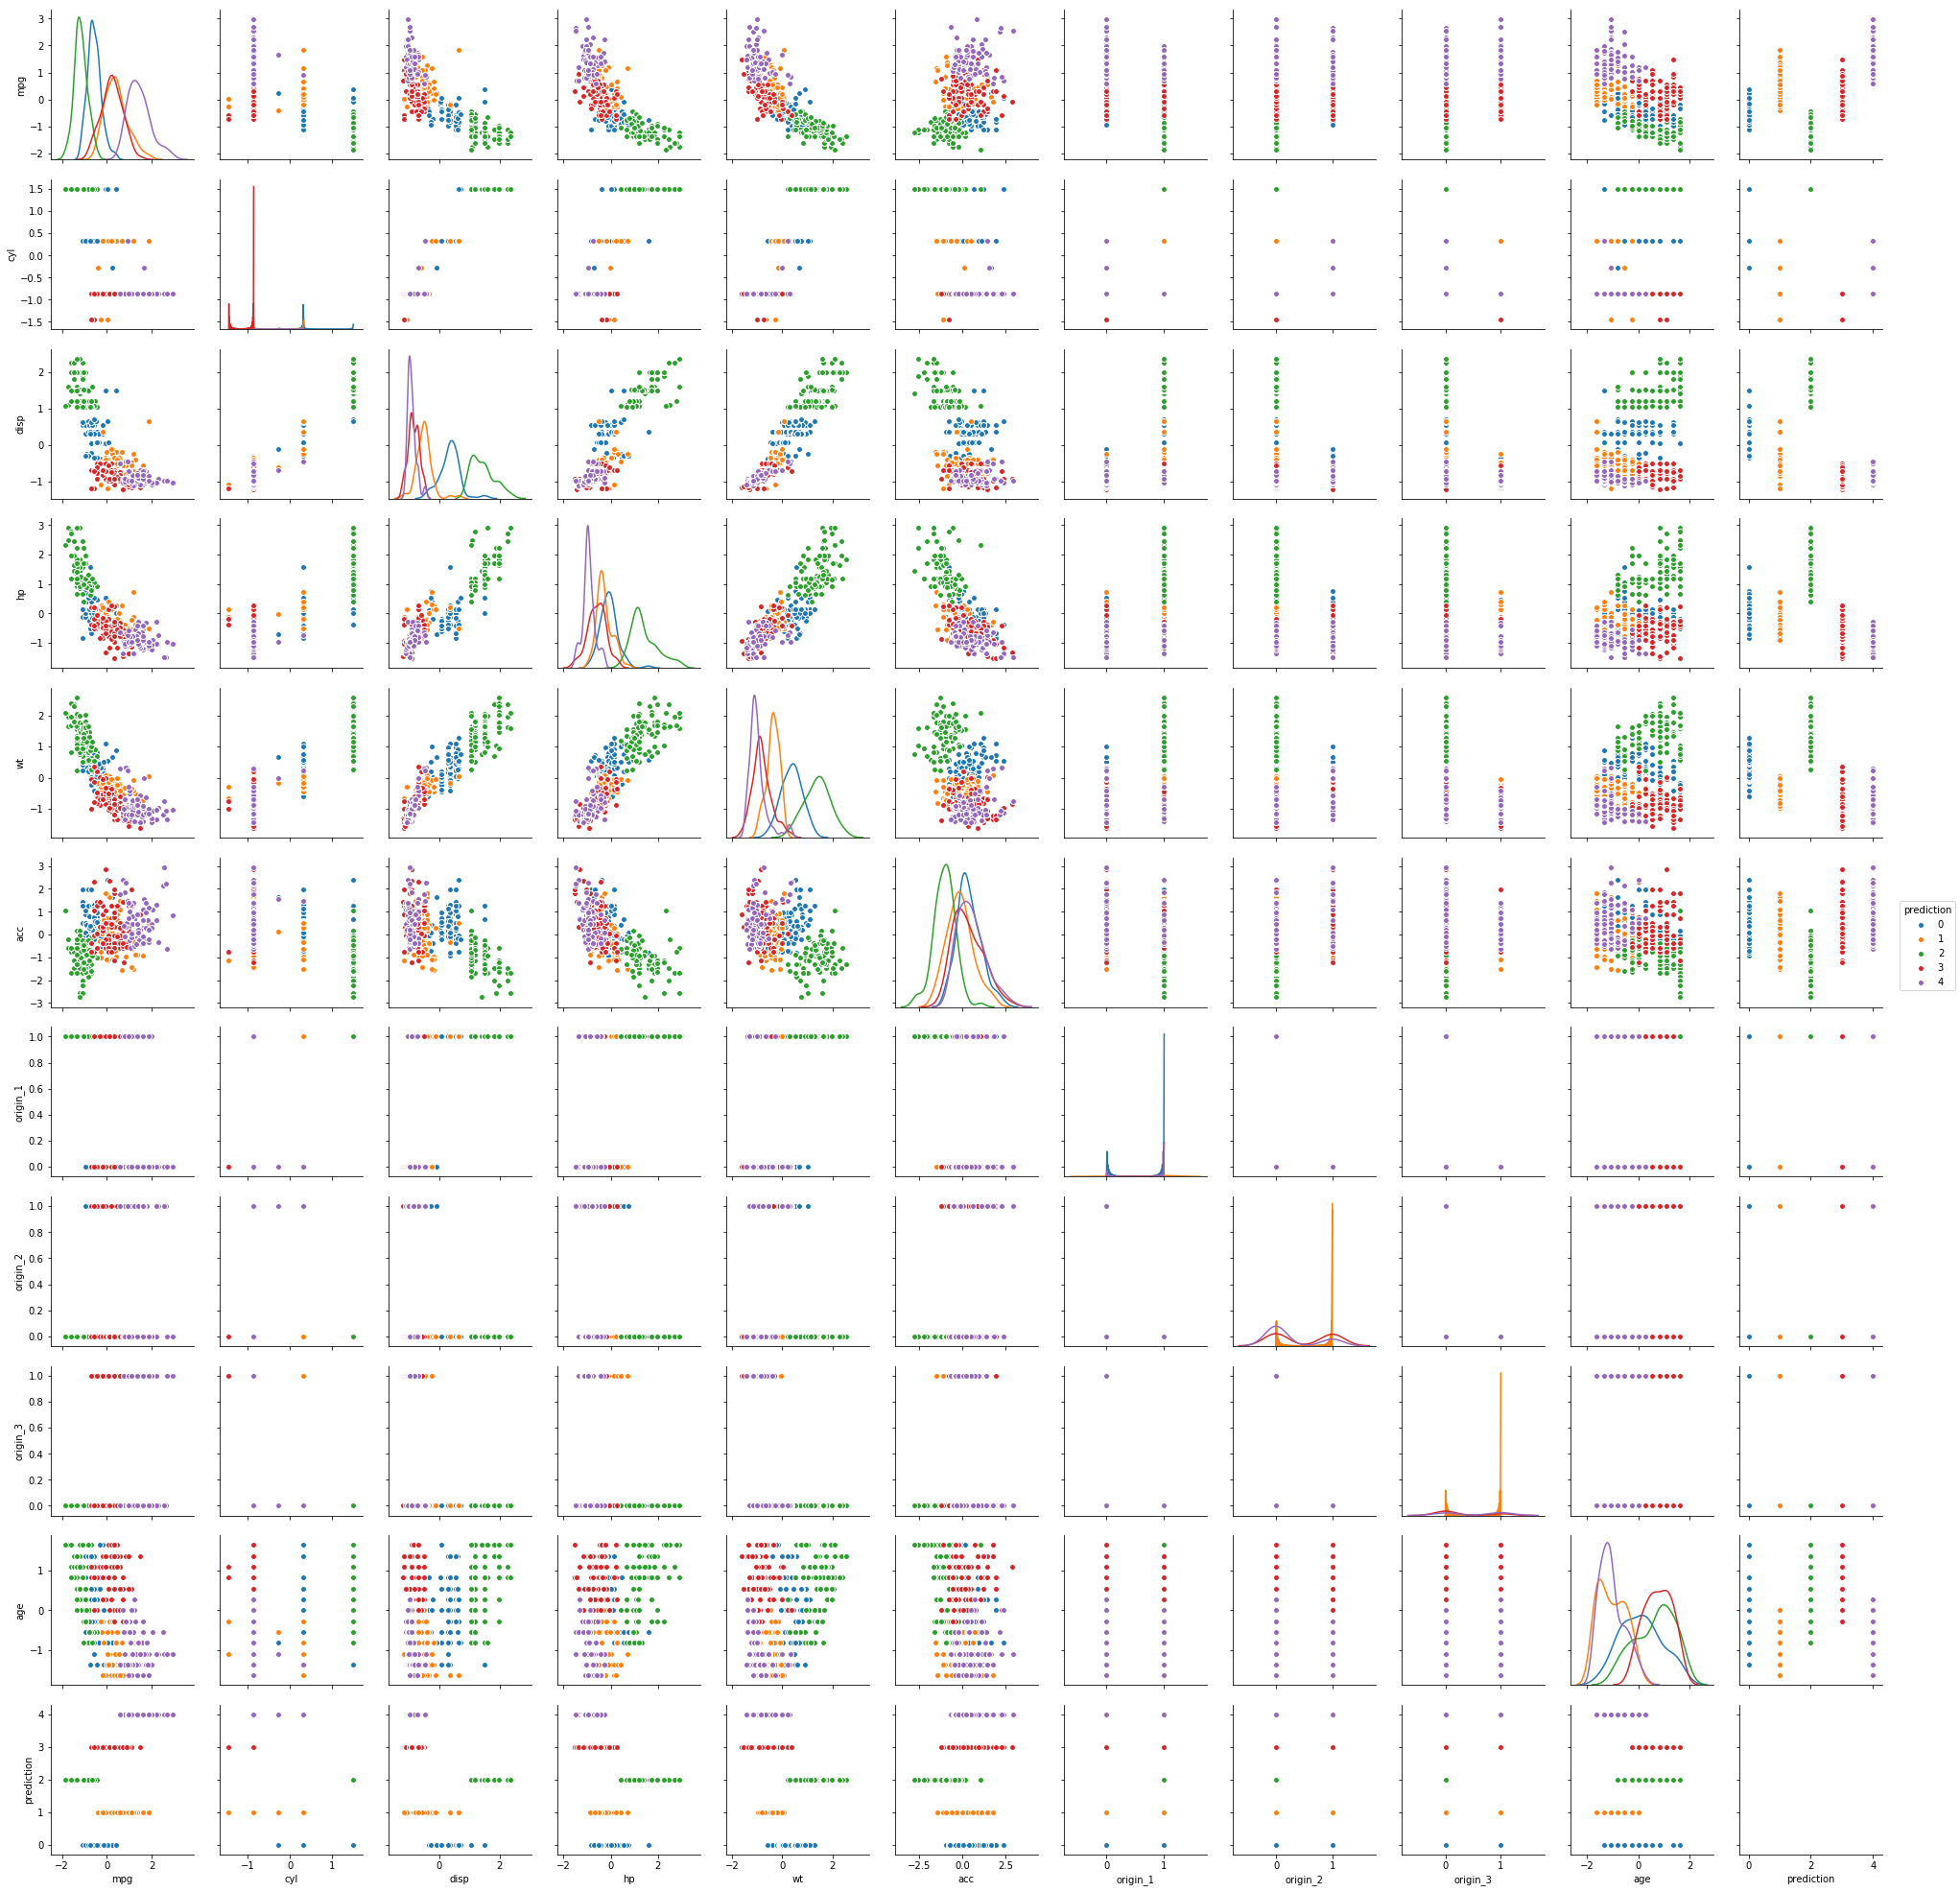

In [39]:
#pair plot analysis to visually check number of likely clusters
sns.pairplot(cars_data_z, hue='prediction', diag_kind='kde')